## Misión _Kepler_

La [misión Kepler](http://archive.stsci.edu/kepler/manuals/archive_manual.pdf) fue diseñada con el propósito de medir una región de la Vía Lactea para detectar y caracterizar planetas del tamaño de la Tierra, y más pequeños, cercanos o dentro de la zona habitable. Ésto se pudo realizar por medio del tránsito de los planetas. Debido a la presición fotométrica que se requiere, Kepler se encuentra fuera de la Tierra (además, de este modo evita las interrupciones causadas por el cíclo del día, de las estaciones, y las perturbaciones atmosféricas).

Entre los [objetivos](http://kepler.nasa.gov/Mission/QuickGuide/) de su misión se encuentra:

1. Determinar la abundancia de planetas similares a la Tierra.
2. Determinar la órbita (tamaño y formas) de estos planetas.
3. Estimar cuántos planetas hay en sistemas estelares.
4. Determinar la propiedades de las estrellas que alojan sistemas planetarios.

Existe un catálogo conocido como [**KIC**](http://tdc-www.harvard.edu/software/catalogs/kic.html) (_Kepler Input Catalog_), el cual es una lista de los objetos observados de forma terrestre por la _Kepler Spectral Classification Program_, con el propósito de preparar la selección de _targets_. Por otro lado, los [**KOI**](http://exoplanetarchive.ipac.caltech.edu/docs/faq.html#KOI) (_Kepler Object of Interest_) son objetos que su flujo ya ha sido observado, y su variación podría ser la indicación del tránsito de un planeta, por lo que algunos son efectivamente planetas, pero otros resultan ser falsos positivos.

En mayo de 2013, Kepler perdió uno de sus giroscopios, pero para no dar por perdido el telescopio espacial se propuso [**K2**](http://danielmarin.naukas.com/2014/02/25/mision-kepler-k2-prolongando-la-vida-del-buscador-de-exoplanetas/). Esta nueva misión se diferencia de la anterior en que ya no apuntará la misma región, sino que irá cambiando de zona por períodos de 75 días, esto es debido a que el telescopio no cuenta con la misma presición de antes, por lo que necesita de la presión del Sol para mantenerse estable. Del mismo modo, el telescopio apuntará a regiones tangentes de la órbita del telescopio, es decir a regiones de la eclíptica. Al [catálogo](https://archive.stsci.edu/k2/epic.pdf) de esta nueva misión se le conoce como **EPIC**  (_ Ecliptic Plane Input Catalog_)

Nosotros analizaremos las curvas de luz de algunos KICs:

* KIC 2305930
* KIC 4348593
* KIC 9469165

utilizando la fotometría [PDCSAP](http://archive.stsci.edu/kepler/manuals/archive_manual.pdf) que corresponde a unflujo en una apertura óptima, medido en electrones por segundo, luego de que el módulo PDC ha aplicado su algortimo a la curva de luz. El algoritmo busca eliminar los errores sistemáticos. Este se diferencia de la fotometría SAP en que en este último no se busca eliminar los errores sistemáticos; su curva de luz es el output del módulo PA en el SOC (_Science operation center_)

################################################################
################################################################

ID = 2305930
Teff = 4723
Log G  = 2.493
Metalicidad = -0.45
Radio = 11.261

################################################################
################################################################

ID = 4348593
Teff = 4885
Log G  = 2.772
Metalicidad = 0.067
Radio = 8.22

################################################################
################################################################

ID = 9469165
Teff = 4936
Log G  = 2.496
Metalicidad = -0.31
Radio = 11.271

################################################################
################################################################


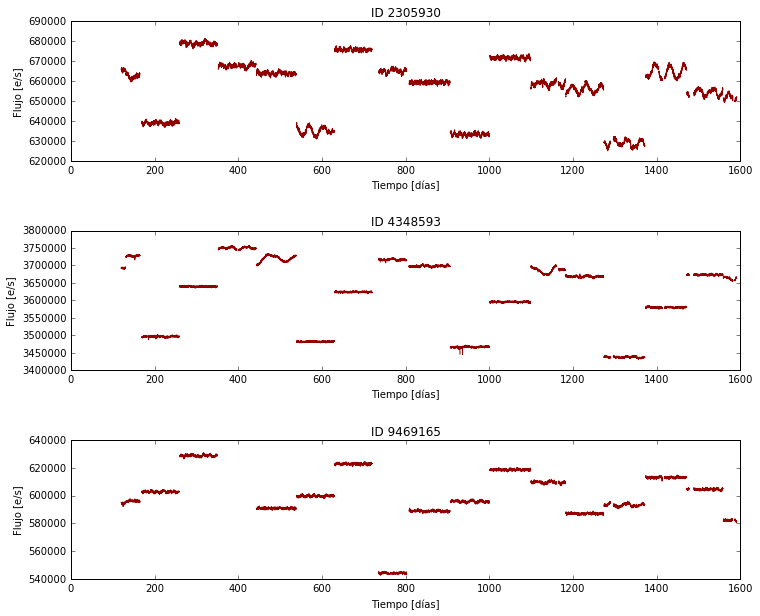

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import kplr

# Configuración de los gráficos.
%matplotlib inline
main_color = '#920000'
err_color = '#924900'
other_color = '#49008F'

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))
fig.subplots_adjust(hspace=.5)
axs = {2305930: ax1, 4348593: ax2, 9469165:ax3}


client = kplr.API()

# Lista de KICs
kics = [2305930, 4348593, 9469165]
# Diccionario de KICs
dict_kic = dict((key, dict()) for key in kics)

# Download the lightcurves for this KOI.
for kic in kics:
    star = client.star(kic)
    params = (star.kic_kepler_id, star.kic_teff, star.kic_logg, star.kic_feh, star.kic_radius)
    print(64 * "#")
    print(64 * "#" + "\n")
    text = "ID = {}\nTeff = {}\nLog G  = {}\nMetalicidad = {}\nRadio = {}\n".format(*params)
    print(text)
    lcs = star.get_light_curves()
    time, flux, ferr, quality = [], [], [], []
    for lc in lcs:
        with lc.open() as f:
            # The lightcurve data are in the first FITS HDU.
            hdu_data = f[1].data
            time.append(hdu_data["time"])
            flux.append(hdu_data["pdcsap_flux"])
            ferr.append(hdu_data["pdcsap_flux_err"]) 
    # Guardamos los datos en el diccionario
    dict_kic[kic]['Time'] = time
    dict_kic[kic]['Flux'] = flux
    dict_kic[kic]['Ferr'] = ferr
    for ind in range(0, len(time)):
        #axs[kic].errorbar(time, flux, fmt='-g', label="data", yerr=ferr, ecolor='red')
        axs[kic].plot(time[ind], flux[ind], '-', color=main_color)
        axs[kic].set_xlabel('Tiempo [días]')
        axs[kic].set_ylabel('Flujo [e/s]')
        axs[kic].set_title('ID {}'.format(kic))
print(64 * "#")
print(64 * "#")

plt.show()


Para el caso de [una](https://arxiv.org/pdf/1108.5683.pdf) RRab Lyr (KIC 3733346) de periocidad 0.6820264 días tenemos:

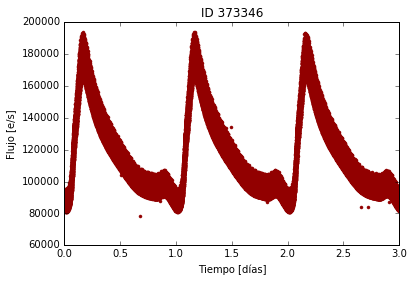

In [2]:
star = client.star(3733346)
lcs = star.get_light_curves(short_cadence=True)
time, flux, ferr, quality = [], [], [], []
for lc in lcs:
    with lc.open() as f:
        # The lightcurve data are in the first FITS HDU.
        hdu_data = f[1].data
        time.append(((hdu_data["time"]/0.6820264)%3))
        flux.append(hdu_data["pdcsap_flux"])
        ferr.append(hdu_data["pdcsap_flux_err"])
for ind in range(0, len(time)):
    plt.plot(time[ind], flux[ind], '.', color=main_color)
    plt.xlabel('Tiempo [días]')
    plt.ylabel('Flujo [e/s]')
    plt.title('ID {}'.format(373346))
plt.show()

Estas estrellas fueron analizadas con [asterosismología](http://arxiv.org/pdf/1205.6407.pdf), que es la determinación del interior estelar utilizando las oscilaciones como ondas sísmicas, donde estás oscilaciones corresponden a las pulsaciones de la estrella, que pueden deberse a modos radiales o no-radiales. Estos modos son asociados a la gravedad (_g-mode_) y a la presión (_p-mode_). Los [parámetros estelares](http://iopscience.iop.org/0067-0049/215/2/19/suppdata/apjs503771t4_mrt.txt) obtenidos por este método para nuestras estrellas son:

In [3]:
from astropy.io import ascii
table = ascii.read("apjs503771t4_mrt.txt")
labels = ['KIC-ID', 'Teff', 'e_Teff', '[M/H]', 'e_[M/H]',
          'Mass', 'EMass', 'eMass', 'Radius', 'ERadius',
          'eRadius', 'log(g)', 'elog(g)', 'Elog(g)']
for kic in dict_kic.keys():
    mask = table['KIC-ID'] == kic
    # Float -> ai! Isochrones é muito manhoso.
    dict_kic[kic].update({x: float(table[mask][x].quantity.value[0]) for x in labels})

# Para ver los resultados.
for kic in kics:
    mask += table['KIC-ID'] == kic
table[mask][labels].show_in_notebook(show_row_index=False)


KIC-ID,Teff,e_Teff,[M/H],e_[M/H],Mass,EMass,eMass,Radius,ERadius,eRadius,log(g),elog(g),Elog(g)
,K,K,,,solMass,solMass,solMass,solRad,solRad,solRad,[cm/s2],[cm/s2],[cm/s2]
9469165,4806,110,-0.66,0.08,0.83,0.1,0.06,9.85,0.41,0.3,2.375,0.013,0.013
4348593,5018,82,0.04,0.05,3.23,0.39,0.41,13.12,0.53,0.58,2.707,0.018,0.017
2305930,4716,107,-0.59,0.08,0.87,0.12,0.06,10.16,0.47,0.27,2.367,0.011,0.014


En general los parámetros son muy parecidos (las mismas órdenes de magnitud). Ahora determinaremos la edad, la masa y el radio de las estrellas utilizando _isochrones_ para determinar el tipo de estrellas:
> **_Spoiler_**

>! El _abstract_ del paper ya nos dice que son gigantes rojas.


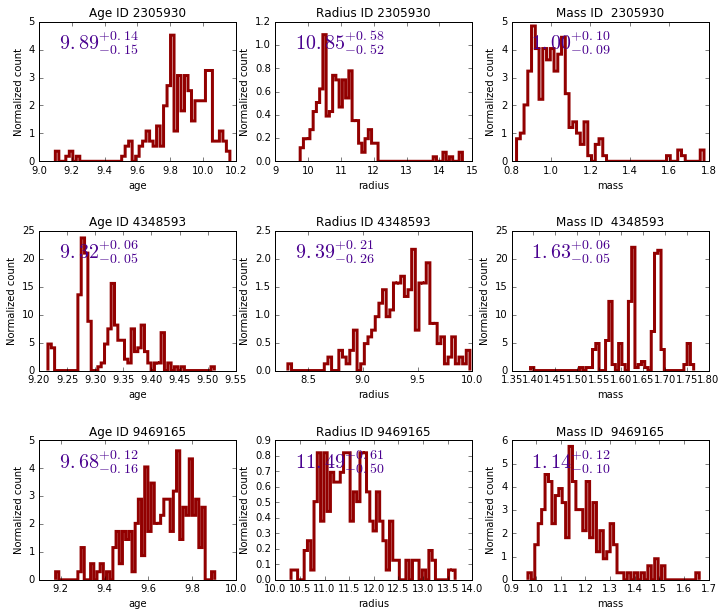

################################################################
################################################################

ID = 4348593
log(g) = 2.707
Teff = 5018.0
Age = 9.324119119598741
Radius = 9.393604976987751
Mass = 1.6306779635965178

################################################################
################################################################

ID = 2305930
log(g) = 2.367
Teff = 4716.0
Age = 9.889990763499144
Radius = 10.851631393539282
Mass = 0.997037994940434

################################################################
################################################################

ID = 9469165
log(g) = 2.375
Teff = 4806.0
Age = 9.676985469605205
Radius = 11.490634147557529
Mass = 1.1441355769369668

################################################################
################################################################


In [4]:
from isochrones import StarModel
from isochrones.dartmouth import Dartmouth_Isochrone
import pymultinest

fig, (ax1, ax2, ax3) = plt.subplots(3, 3, figsize=(12, 10))
fig.subplots_adjust(hspace=.5)
axs = {2305930: ax1, 4348593: ax2, 9469165:ax3}

def plot_this_please(model, prop, ax, title):
    samples, stats = model.prop_samples(prop)
    fig = ax.hist(samples,bins=50,normed=True,
             histtype='step',lw=3, color=main_color)
    ax.set_xlabel(prop)
    ax.set_ylabel('Normalized count')
    ax.set_title(title)
    med,lo,hi = stats
    ax.annotate('$%.2f^{+%.2f}_{-%.2f}$' % (med,hi,lo),
                 xy=(0.1,0.8),xycoords='axes fraction',fontsize=20,
                 color=other_color)
    return stats


#spectroscopic properties (value, uncertainty)
for kic in dict_kic.values():
    Teff = (kic['Teff'], kic['e_Teff'])
    logg = (kic['log(g)'], kic['elog(g)'] if kic['elog(g)'] > kic['Elog(g)'] else kic['Elog(g)'])
    feh = (kic['[M/H]'], kic['e_[M/H]'])
    dar = Dartmouth_Isochrone()
    model  = StarModel(dar, Teff=Teff, logg=logg, feh=feh)
    model.fit_multinest(n_live_points=50, verbose=True, overwrite=True)
    #model.triangle()
    name = int(kic['KIC-ID'])
    stats = plot_this_please(model, 'age', axs[name][0], 'Age ID {}'.format(name))
    kic['Age'] = stats[0]
    stats = plot_this_please(model, 'radius', axs[name][1], 'Radius ID {}'.format(name))
    kic['Radius'] = stats[0]
    stats = plot_this_please(model, 'mass', axs[name][2], 'Mass ID  {}'.format(name))
    kic['Mass'] = stats[0]
plt.show()

for kic in dict_kic.values():
    params = (int(kic['KIC-ID']), kic['log(g)'], kic['Teff'], kic['Age'], kic['Radius'], kic['Mass'])
    print(64 * "#")
    print(64 * "#" + "\n")
    text = "ID = {}\nlog(g) = {}\nTeff = {}\nAge = {}\nRadius = {}\nMass = {}\n".format(*params)
    print(text)
print(64 * "#")
print(64 * "#")


Podemos [notar](http://www.atlasoftheuniverse.com/startype.html) que estas estrellas las podemos clasificar entre estrellas de clase G5III y G0III: gigantes rojas.

Ahora eliminamos las descontinuidades de las curvas de luz. Para ellos utilizaremos la media y se la restamos a cada _quarter_:

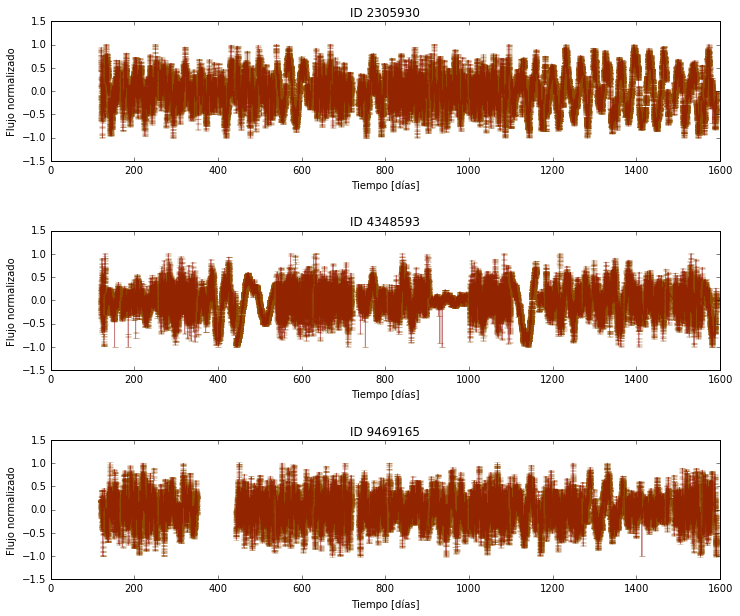

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))
fig.subplots_adjust(hspace=.5)
axs = {2305930: ax1, 4348593: ax2, 9469165:ax3}

for kic in dict_kic.keys():
    for ind, quarter_flux in enumerate(dict_kic[kic]['Flux']):
        median = np.nanmedian(quarter_flux)
        dict_kic[kic]['Flux'][ind] -= median
        # Un servidor no conoce una manera mejor de encontrar el valor absluto mayor.
        maximo = abs(np.nanmax(dict_kic[kic]['Flux'][ind]))
        minimo = abs(np.nanmin(dict_kic[kic]['Flux'][ind]))
        maximo = maximo if maximo > minimo else minimo
        dict_kic[kic]['Flux'][ind] /= maximo
        dict_kic[kic]['Ferr'][ind] /= maximo
        
        # Por algún motivo gatspy no está ni ahí con los nan, así que hay que quitarlos.
        delnan = np.isnan(dict_kic[kic]['Flux'][ind])
        dict_kic[kic]['Flux'][ind] = dict_kic[kic]['Flux'][ind][~delnan]
        dict_kic[kic]['Time'][ind] = dict_kic[kic]['Time'][ind][~delnan]
        dict_kic[kic]['Ferr'][ind] = dict_kic[kic]['Ferr'][ind][~delnan]
        
    time = dict_kic[kic]['Time']
    flux = dict_kic[kic]['Flux']
    ferr = dict_kic[kic]['Ferr']
    for ind in range(0, len(dict_kic[kic]['Flux'])):
        axs[kic].errorbar(time[ind], flux[ind], fmt='-',
                          color=main_color, label="data",
                          yerr=ferr[ind], ecolor=err_color,
                          alpha=0.5)
        #axs[kic].plot(time[ind], flux[ind], '-g')
        axs[kic].set_xlabel('Tiempo [días]')
        axs[kic].set_ylabel('Flujo normalizado')
        axs[kic].set_title('ID {}'.format(kic))
plt.show()
                
        

Ahora vamos a calcular un periodograma de [Lomb-Scargle](https://arxiv.org/pdf/0901.2573v1.pdf), que es un método que consiste en fitear a una función compuesta de senos y cosenos, pero sin usar un conjunto de ecuaciones lineales para cada período, sino una solución analítica.

Finding optimal frequency:
 - Estimated peak width = 0.00427
 - Using 5 steps per peak; omega_step = 0.000855
 - User-specified period range:  0.2 to 1e+02
 - Computing periods at 36690 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
ID = 4348593	period = 56.91387344331872

Finding optimal frequency:
 - Estimated peak width = 0.00427
 - Using 5 steps per peak; omega_step = 0.000855
 - User-specified period range:  0.2 to 1e+02
 - Computing periods at 36690 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
ID = 2305930	period = 33.19730798164694

Finding optimal frequency:
 - Estimated peak width = 0.00427
 - Using 5 steps per peak; omega_step = 0.000855
 - User-specified period range:  0.2 to 1e+02
 - Computing periods at 36690 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
ID = 9469165	period = 45.59485111968886



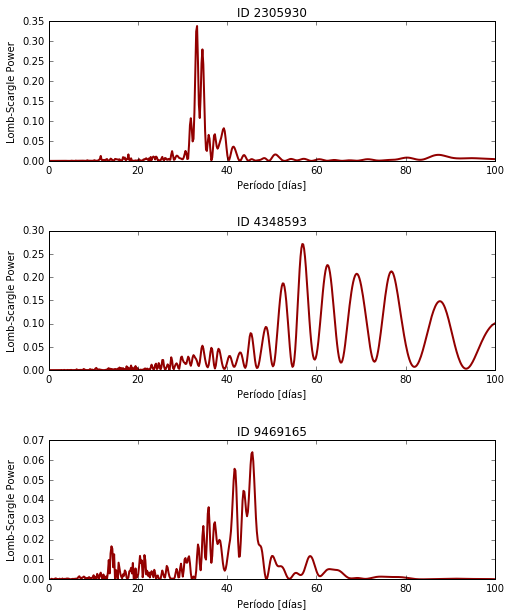

In [6]:
from gatspy import datasets, periodic
import warnings
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 10))
fig.subplots_adjust(hspace=.5)
axs = {2305930: ax1, 4348593: ax2, 9469165:ax3}

for kic in dict_kic.keys():
    time = np.concatenate(tuple(dict_kic[kic]['Time']))
    flux = np.concatenate(tuple(dict_kic[kic]['Flux']))
    ferr = np.concatenate(tuple(dict_kic[kic]['Ferr']))
    
    # Buscamos el período
    model = periodic.LombScargleFast().fit(time, flux, ferr)
    model.optimizer.period_range = (0.2, 100)
    period = model.best_period
    dict_kic[kic]['Period'] = period
    dict_kic[kic]['TFit'] = np.linspace(0, 3*period, 100)
    dict_kic[kic]['FFit'] = model.predict(dict_kic[kic]['TFit'])
    print("ID = {1}\tperiod = {0}\n".format(period, kic))
    periods = np.linspace(0.3, 100, 500)

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        scores = model.score(periods)

    # Plot the results
    axs[kic].plot(periods, scores, color=main_color, linewidth=2)
    axs[kic].set_xlabel('Período [días]')
    axs[kic].set_ylabel('Lomb-Scargle Power')
    axs[kic].set_title('ID {}'.format(kic))
plt.show()


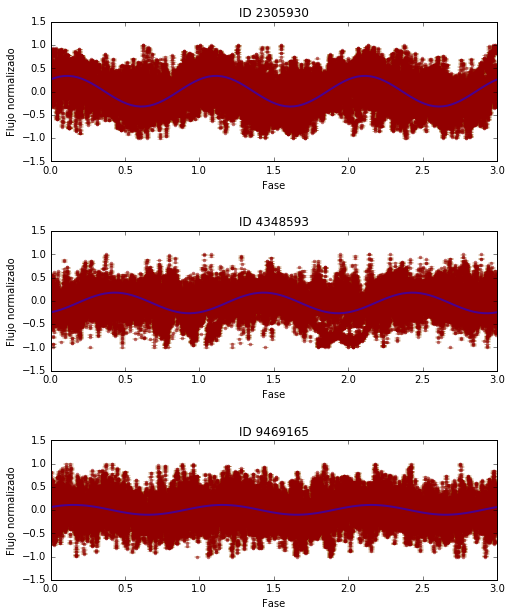

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 10))
fig.subplots_adjust(hspace=.5)
axs = {2305930: ax1, 4348593: ax2, 9469165:ax3}

for kic in dict_kic.keys():
    time = np.concatenate(tuple(dict_kic[kic]['Time']))
    flux = np.concatenate(tuple(dict_kic[kic]['Flux']))
    ferr = np.concatenate(tuple(dict_kic[kic]['Ferr']))
    
    period = dict_kic[kic]['Period']
    tfit = dict_kic[kic]['TFit']
    fluxfit = dict_kic[kic]['FFit']

    # Plot the results
    phase = (time / period) % 3
    phasefit = (tfit /period) 
    
    #axs[kic].errorbar(time[ind] % 2*period, flux[ind], fmt='.g', label="data", yerr=ferr[ind], ecolor='red')
    #axs[kic].plot(phase, phase fit, '.g', alpha=0.5)
    #axs[kic].plot(, '.r', alpha=0.2)
    axs[kic].errorbar(phase, flux, yerr=ferr, fmt='.',
                      color=main_color, ecolor=err_color,
                      alpha=0.5)
    axs[kic].plot(phasefit, fluxfit, '-', 
                  color=other_color, linewidth=2) # Pedazo de vibración entre los colores.
    axs[kic].set_xlabel('Fase')
    axs[kic].set_ylabel('Flujo normalizado')
    axs[kic].set_title('ID {}'.format(kic))
plt.show()

Finalmente, tenemos:

In [8]:
for kic in dict_kic.values():
    params = (int(kic['KIC-ID']), kic['log(g)'], kic['Teff'], kic['Age'], kic['Radius'], kic['Mass'], kic['Period'])
    print(64 * "#")
    print(64 * "#" + "\n")
    text = "ID = {}\nlog(g) = {}\nTeff = {}\nAge = {}\nRadius = {}\nMass = {}\nPeriodo = {}".format(*params)
    print(text)
    freq_max = kic['Mass']/((kic['Radius']**2)*np.sqrt(kic['Teff']))  # De la pág. 22 de la tésis citada más adelante.
    freq = 1/kic['Period']
    print("Frecuencia = {}\nFrecuencia_max = {}\n".format(freq, freq_max))
print(64 * "#")
print(64 * "#")

################################################################
################################################################

ID = 4348593
log(g) = 2.707
Teff = 5018.0
Age = 9.324119119598741
Radius = 9.393604976987751
Mass = 1.6306779635965178
Periodo = 56.91387344331872
Frecuencia = 0.017570408399560315
Frecuencia_max = 0.00026087849932886935

################################################################
################################################################

ID = 2305930
log(g) = 2.367
Teff = 4716.0
Age = 9.889990763499144
Radius = 10.851631393539282
Mass = 0.997037994940434
Periodo = 33.19730798164694
Frecuencia = 0.030122924441730273
Frecuencia_max = 0.000123291956345052

################################################################
################################################################

ID = 9469165
log(g) = 2.375
Teff = 4806.0
Age = 9.676985469605205
Radius = 11.490634147557529
Mass = 1.1441355769369668
Periodo = 45.59485111968886
Frecuencia = 0.02

En comparación a la estrella RRab Lyr anterior, el período no es tan marcado. [Considerando](https://fys.kuleuven.be/ster/pub/2000-2009/text-hekker.pdf) que la frecuencia máxima en que rota la estrella es inversamente proporcional al radio de la estrella, podemos notar que existe una relación entre los períodos y su radio para **KIC2305930** y **KIC9469165**. Sin embargo para KIC4348593 esto no se cumple, pero podemos ver que su período no es tan preciso como en los otros casos. Por lo que estos períodos podrían deberse a la rotación de las estrellas, donde el flujo se ve reducido por la presencia de manchas estelares.